<a href="https://colab.research.google.com/github/taslimmuhammed/pytorch/blob/main/pytorch_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from torch import nn # nn contains all building blocks of neural network

In [70]:
def plot_data(X_train, y_train, X_test, y_test, predictions=None):
  plt.figure(figsize=(13,7))
  plt.scatter(X_train, y_train, c="b", s=4, label="Training Data")
  plt.scatter(X_test, y_test, c="r", s=10, label="Testing Data")
  if predictions!=None:
    plt.scatter(X_test, predictions, c="g", s=10, label="Predictions")
  plt.legend()
  plt.show()

# Creating a linear regression model

In [71]:
class LinearRegresssionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.wieghts = nn.Parameter(torch.randn(1,#-> start with random wieghts
                                            requires_grad=True, #-> can this paramter be adjusted using gradient decent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.wieghts* x+ self.bias

In [72]:
torch.manual_seed(43) # for having the same value in each learning
model_0 = LinearRegresssionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [73]:
model_0.state_dict()

OrderedDict([('wieghts', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

In [74]:
X = torch.arange(1,101).unsqueeze(dim=1)
y= X*6-9
X[0:5],y[0:5]

(tensor([[1],
         [2],
         [3],
         [4],
         [5]]),
 tensor([[-3],
         [ 3],
         [ 9],
         [15],
         [21]]))

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape

torch.Size([80, 1])

In [76]:
y_pred = model_0(X_test)
y_pred

tensor([[-40.2583],
        [-43.5003],
        [-25.9935],
        [ -6.5415],
        [ -3.9478],
        [-14.9707],
        [-23.3999],
        [-15.6191],
        [-41.5551],
        [-19.5095],
        [-59.0619],
        [-27.9387],
        [-62.9523],
        [-53.2263],
        [-42.8519],
        [-48.6875],
        [ -9.7835],
        [-44.7971],
        [-29.8839],
        [-11.7287]], grad_fn=<AddBackward0>)

In [77]:
with torch.inference_mode():
  y_pred = model_0(X_test)
y_pred

tensor([[-40.2583],
        [-43.5003],
        [-25.9935],
        [ -6.5415],
        [ -3.9478],
        [-14.9707],
        [-23.3999],
        [-15.6191],
        [-41.5551],
        [-19.5095],
        [-59.0619],
        [-27.9387],
        [-62.9523],
        [-53.2263],
        [-42.8519],
        [-48.6875],
        [ -9.7835],
        [-44.7971],
        [-29.8839],
        [-11.7287]])

**you can see that the grad term at the end of previous result is missing here, The inference mode is exclusively for predicting purpose and it disables the auto_grad part**

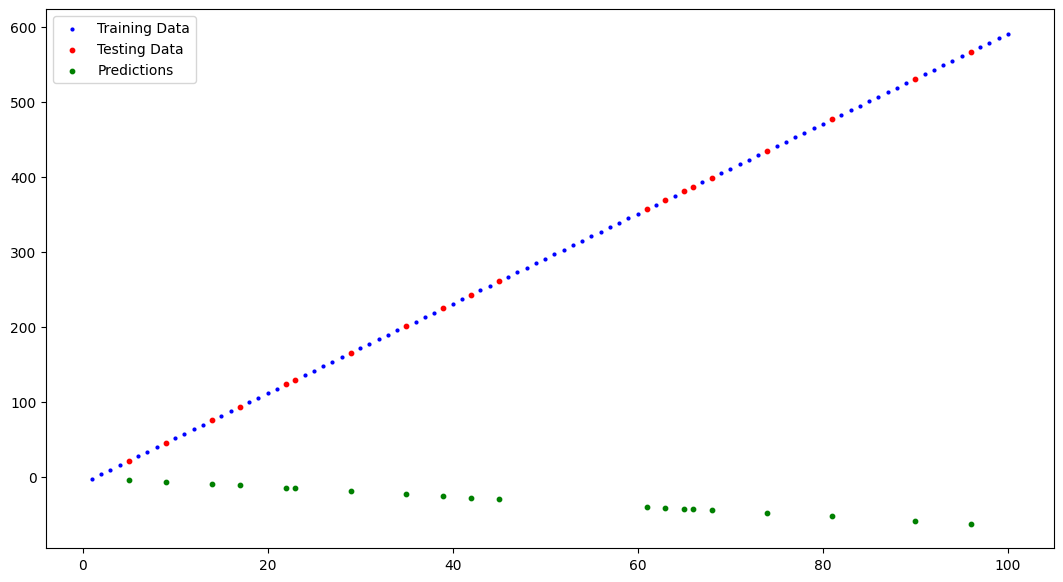

In [78]:
plot_data(X_train,y_train,X_test,y_test,y_pred)

In [79]:
loss_fn = nn.L1Loss() # mean absolute error
optimizer = torch.optim.SGD(model_0.parameters(),lr=0.01, ) #SGD- sotchastic gradient decent

# Training Model
1. model_0.eval() - turn on evaluating mode for model, turn off diff settings required for traning
2. model_0.train() - turn on training mode
3. model_0.inference_mode()/model_0.no_grad() - turn off auto grad, only this result can be used for plotting

In [81]:
epochs = 10000
epoch_arr = []
train_cost = []
test_cost = []
for epoch in range(epochs):
  # training model
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() #starting optimzer fresh, by defualt it'll accumilate previous results
  loss.backward()
  optimizer.step()

  # noting loss, for testing and graphing purpouses only
  if epoch%1000==0:
    print(loss)
    print(model_0.state_dict())
    with torch.inference_mode():
      model_0.eval()
      epoch_arr.append(epoch)
      train_cost.append(loss)
      y_pred_test = model_0(X_test)
      test_loss = loss_fn(y_pred_test,y_test)
      test_cost.append(test_loss)


tensor(332.9762, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([-0.1354])), ('bias', tensor([-0.6961]))])
tensor(19.8538, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9894])), ('bias', tensor([-1.9948]))])
tensor(20.8699, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9934])), ('bias', tensor([-3.2068]))])
tensor(20.9652, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0124])), ('bias', tensor([-4.1919]))])
tensor(23.2196, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.9839])), ('bias', tensor([-5.0486]))])
tensor(18.0696, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0973])), ('bias', tensor([-5.7577]))])
tensor(22.7980, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0171])), ('bias', tensor([-6.3066]))])
tensor(21.4982, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([6.0513])), ('bias', tensor([-6.8053]))])
tensor(25.3797, grad_fn=<MeanBackward0>)
OrderedDict([('wieghts', tensor([5.98

The equation we did was **y = 6x - 9** , it's getting closer to that

OrderedDict([('wieghts', tensor([5.5572])), ('bias', tensor([-7.8281]))])


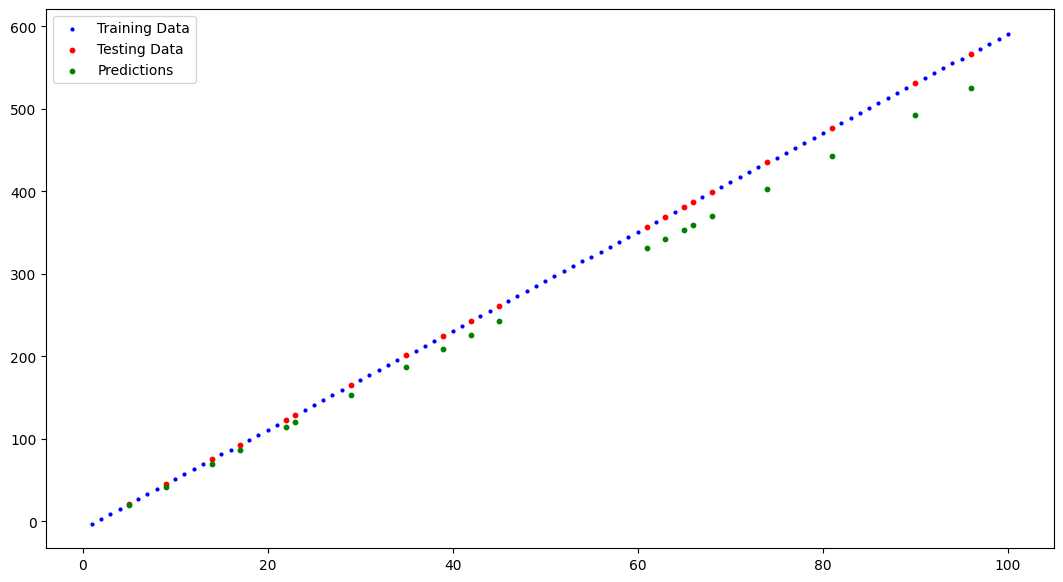

In [82]:
# Testing
with torch.no_grad():
  model_0.eval()
  y_pred = model_0(X_test)
print(model_0.state_dict())
plot_data(X_train, y_train, X_test, y_test, y_pred)

Text(0, 0.5, 'Cost')

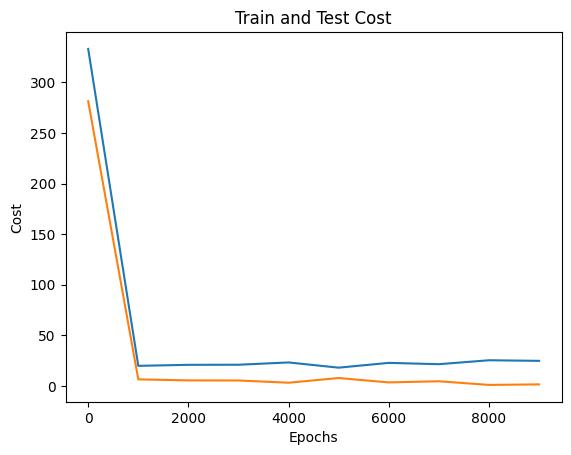

In [85]:
plt.plot(epoch_arr,np.array(torch.tensor(train_cost)), label="Train Loss")
plt.plot(epoch_arr,test_cost, label="Test Loss")
plt.title("Train and Test Cost")
plt.xlabel("Epochs")
plt.ylabel("Cost")